In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import yaml
import numpy as np

In [28]:
def plot_total(path):
    with open(path, 'r') as f:
        result = yaml.full_load(f)
        cost_for_each_step_total = []
    cost_for_each_step_total.append(result['step1to4'])
    cost_for_each_step_total.append(sum(result['step5_time']))
    cost_for_each_step_total.append(sum(result['step6a_time']))
    cost_for_each_step_total.append(sum(result['step6b_time']))
    cost_for_each_step_total.append(sum(result['step7_time']))
    cost_for_each_step_total.append(sum(result['step8_time']))
    cost_for_each_step_total.append(sum(result['step9_time']))
    cost_for_each_step_total.append(sum(result['step10_time']))
    cost_for_each_step_total.append(sum(result['step11_time']))

    cost_for_each_step_total_name = ["s1-s4","s5", "s6a", "s6b","s7", "s8", "s9", "s10", "s11"]
    fig, ax = plt.subplots()
    ax.bar(range(len(cost_for_each_step_total)),cost_for_each_step_total,tick_label=cost_for_each_step_total_name, color='black')
    ax.set_xlabel('Steps (1 - 11)')
    ax.set_ylabel('[cycles]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Running time of OPUS on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n', loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

def plot_two_total(path1, path2):
    with open(path1, 'r') as f:
        result = yaml.full_load(f)
    cost_for_each_step_total1 = []
    cost_for_each_step_total1.append(result['step1to4'])
    cost_for_each_step_total1.append(sum(result['step5_time']))
    cost_for_each_step_total1.append(sum(result['step6a_time']))
    cost_for_each_step_total1.append(sum(result['step6b_time']))
    cost_for_each_step_total1.append(sum(result['step7_time']))
    cost_for_each_step_total1.append(sum(result['step8_time']))
    cost_for_each_step_total1.append(sum(result['step9_time']))
    cost_for_each_step_total1.append(sum(result['step10_time']))
    cost_for_each_step_total1.append(sum(result['step11_time']))

    with open(path2, 'r') as f:
        result = yaml.full_load(f)
    cost_for_each_step_total2 = []
    cost_for_each_step_total2.append(result['step1to4'])
    cost_for_each_step_total2.append(sum(result['step5_time']))
    cost_for_each_step_total2.append(sum(result['step6a_time']))
    cost_for_each_step_total2.append(sum(result['step6b_time']))
    cost_for_each_step_total2.append(sum(result['step7_time']))
    cost_for_each_step_total2.append(sum(result['step8_time']))
    cost_for_each_step_total2.append(sum(result['step9_time']))
    cost_for_each_step_total2.append(sum(result['step10_time']))
    cost_for_each_step_total2.append(sum(result['step11_time']))

    cost_for_each_step_total_name = ["s1-s4","s5", "s6a", "s6b","s7", "s8", "s9", "s10", "s11"]
    fig, ax = plt.subplots()
    ax.set_xlabel('Steps (1 - 11)')
    ax.set_ylabel('[cycles]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Running time of OPUS on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n', loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    width = 0.35  # the width of the bars
    x = np.arange(len(cost_for_each_step_total1))
    rects1 = ax.bar(x - width/2, cost_for_each_step_total1, width, label='before optimization', color='black')
    rects2 = ax.bar(x + width/2, cost_for_each_step_total2, width, label='after optimization', color='brown')
    ax.set_xticks(x, cost_for_each_step_total_name)
    ax.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')

def plot_step_performance(path, step_name):
    with open(path, 'r') as f:
        result = yaml.full_load(f)
    plt.figure(figsize=(20,14), dpi= 160)
    run_time = result['step' + step_name + '_time']
    flops = result['step' + step_name + '_flop']
    performance = [w/t for t, w in zip(run_time, flops)]
    fig, ax = plt.subplots()
    x_list = np.arange(0, len(performance), 1)
    
    ax.set_xlabel('iterations')
    ax.set_ylabel('[flops/cycle]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Performance of OPUS (step{}) on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n'.format(step_name), loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.plot(x_list, performance, marker = "o", color = 'brown', markersize= 3)
def plot_two_step_performance(path1, path2, step_name):
    with open(path1, 'r') as f:
        result = yaml.full_load(f)
    plt.figure(figsize=(20,14), dpi= 160)
    run_time = result['step' + step_name + '_time']
    flops = result['step' + step_name + '_flop']
    performance1 = [w/t for t, w in zip(run_time, flops)]

    with open(path2, 'r') as f:
        result = yaml.full_load(f)
    plt.figure(figsize=(20,14), dpi= 160)
    run_time = result['step' + step_name + '_time']
    flops = result['step' + step_name + '_flop']
    performance2 = [w/t for t, w in zip(run_time, flops)]


    fig, ax = plt.subplots()
    x_list = np.arange(0, len(performance1), 1)
    
    ax.set_xlabel('iterations')
    ax.set_ylabel('[flops/cycle]', loc = 'top', rotation="horizontal")
    ax.grid(axis="y", color='white')
    ax.set_facecolor(color='gainsboro')
    ax.set_title('Performance of OPUS (step{}) on Intel i7-7560 CPU, 2.40GHz\nCompiler: GCC 9.4.0\nFlags:-march=native\n'.format(step_name), loc='left', fontweight="bold")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.plot(x_list, performance1, marker = "o", color = 'black', markersize= 3, label = 'before optimization')
    ax.plot(x_list, performance2, marker = "o", color = 'brown', markersize= 3, label = 'after optimization')
    ax.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    

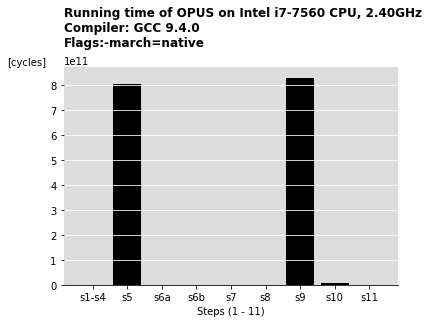

In [4]:
plot_total('../output/baseline_solver_d4.txt')

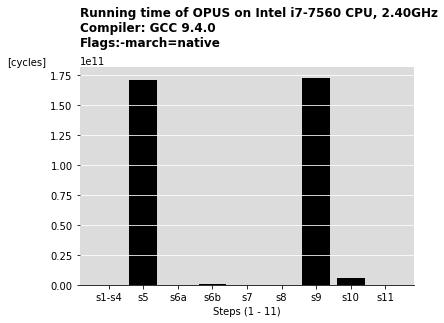

In [5]:
plot_total('../output/block_opt_eval_opt_d4.txt')

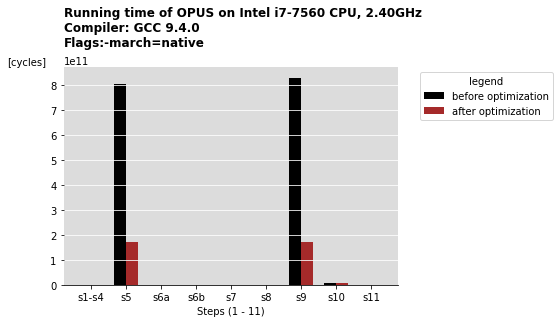

In [14]:
plot_two_total('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt')

<Figure size 3200x2240 with 0 Axes>

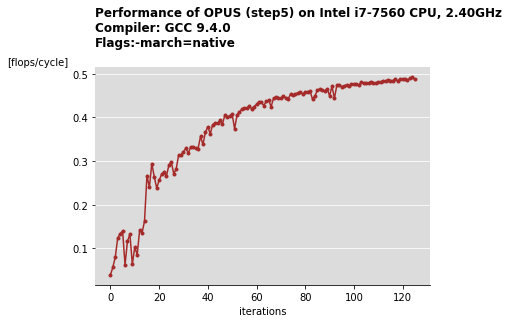

In [17]:
plot_step_performance('../output/block_opt_eval_opt_d4.txt', '5')

<Figure size 3200x2240 with 0 Axes>

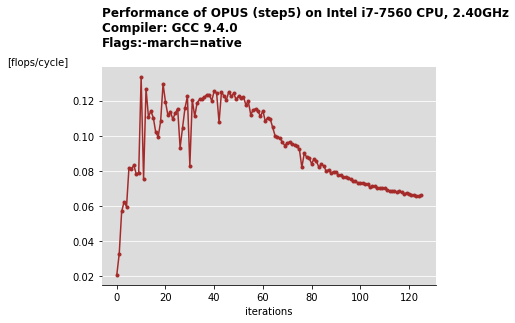

In [18]:
plot_step_performance('../output/baseline_solver_d4.txt', '5')

<Figure size 3200x2240 with 0 Axes>

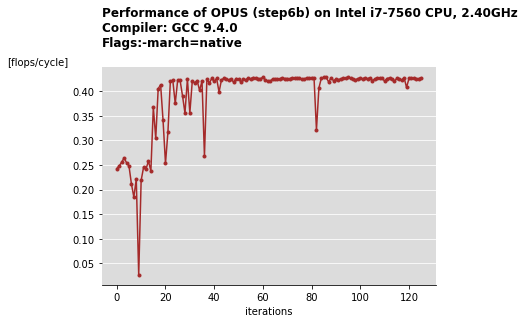

In [19]:
plot_step_performance('../output/block_opt_eval_opt_d4.txt', '6b')

<Figure size 3200x2240 with 0 Axes>

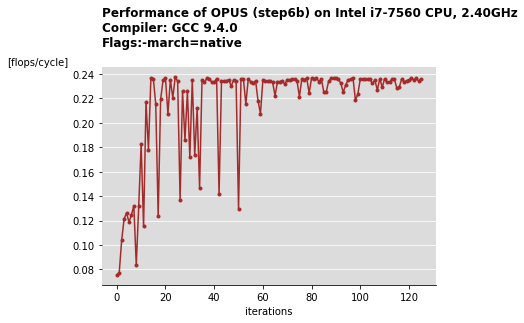

In [20]:
plot_step_performance('../output/baseline_solver_d4.txt', '6b')

<Figure size 3200x2240 with 0 Axes>

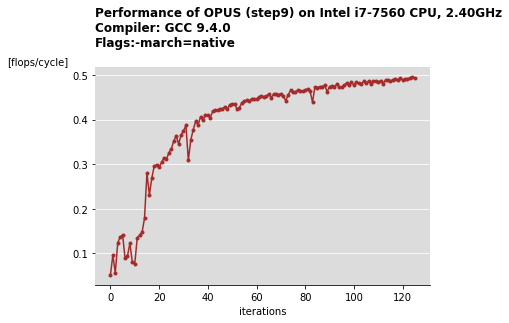

In [21]:
plot_step_performance('../output/block_opt_eval_opt_d4.txt', '9')

<Figure size 3200x2240 with 0 Axes>

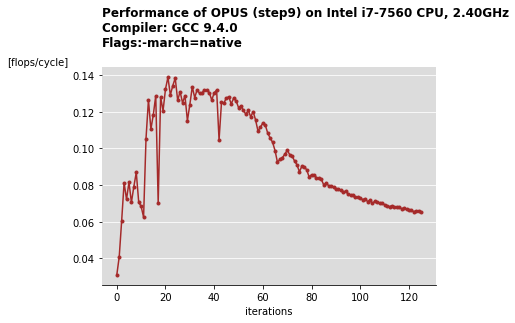

In [22]:
plot_step_performance('../output/baseline_solver_d4.txt', '9')

<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

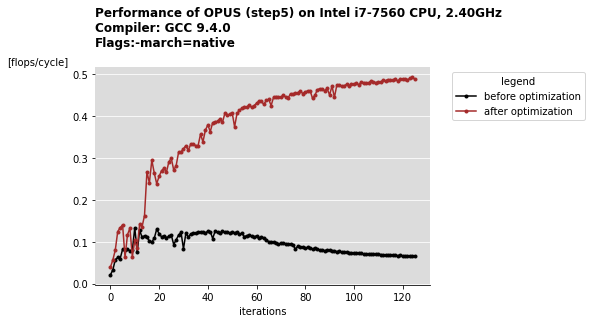

In [30]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '5')

<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

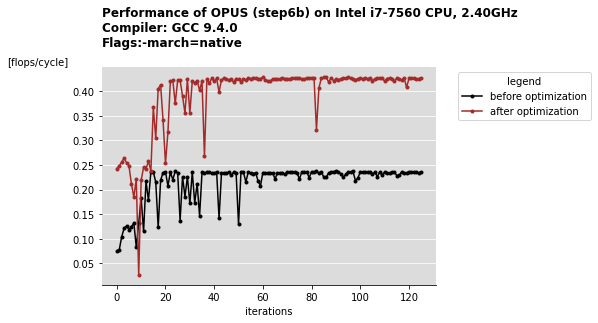

In [31]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '6b')

<Figure size 3200x2240 with 0 Axes>

<Figure size 3200x2240 with 0 Axes>

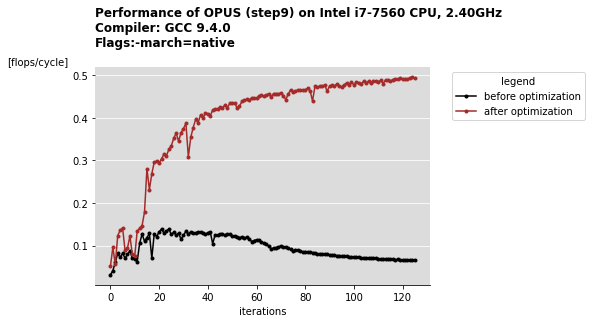

In [32]:
plot_two_step_performance('../output/baseline_solver_d4.txt', '../output/block_opt_eval_opt_d4.txt', '9')